<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [271]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [272]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
    
#!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2021-06-28 00:41:02--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-06-28 00:41:02 (78.1 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [291]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [292]:
df.shape

(346, 10)

### Convert to date time object


In [293]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [294]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [295]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y
#!conda install -c anaconda pydotplus -y

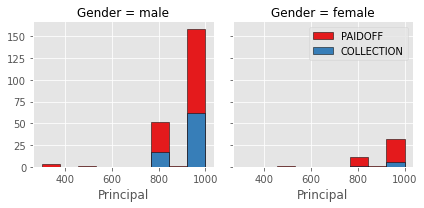

In [296]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

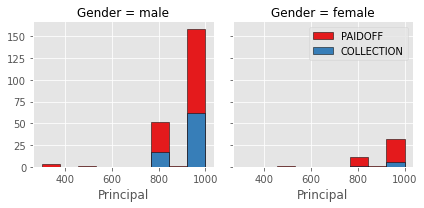

In [297]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

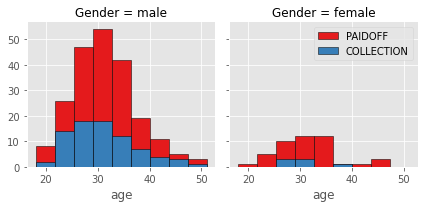

In [298]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


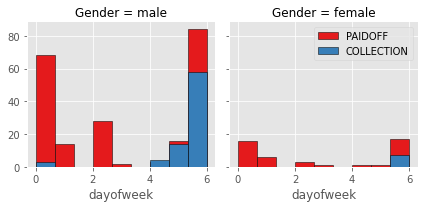

In [299]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [300]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [301]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [302]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [303]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [304]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [305]:
Feature = df[['terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,30,45,0,0,0,1,0
1,30,33,1,0,1,0,0
2,15,27,0,0,0,0,1
3,30,28,1,1,0,0,1
4,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [306]:
X = Feature
X[0:5]

,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,30,45,0,0,0,1,0
1,30,33,1,0,1,0,0
2,15,27,0,0,0,0,1
3,30,28,1,1,0,0,1
4,30,29,0,1,0,0,1


What are our lables?


In [307]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [308]:
X= preprocessing.StandardScaler().fit(X).transform(X)

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [309]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 7) (276,)
Test set: (70, 7) (70,)


In [310]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
train_accuracy=[]
test_accuracy=[]
std=[]
yhats=[]
for k in range(1,10):
    ##fit model
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    #prediction
    yhat = neigh.predict(X_test)
    yhats.append(yhat)
    #train_accuracy
    train_accuracy.append(metrics.accuracy_score(y_train, neigh.predict(X_train)))
    #test_accuracy
    test_accuracy.append(metrics.accuracy_score(y_test, yhat))
    #standard deviation
    std.append(np.std(yhat==y_test)/np.sqrt(yhat.shape[0]))    
##store the information in a dataframe   
accuracy=pd.concat([pd.Series(range(1,10)).rename('K'),round(pd.Series(train_accuracy).rename('Train Accuracy (%)')*100,2),round(pd.Series(test_accuracy).rename('Test Accuracy (%)')*100,2),round(pd.Series(std).rename('Standard deviation'),3)],axis=1)
accuracy.sort_values('Test Accuracy (%)',ascending=False).reset_index(drop=True)
accuracy

,K,Train Accuracy (%),Test Accuracy (%),Standard deviation
0,1,86.96,68.57,0.055
1,2,82.25,62.86,0.058
2,3,84.42,77.14,0.050
3,4,81.16,72.86,0.053
4,5,82.61,75.71,0.051
5,6,82.25,74.29,0.052
6,7,81.52,78.57,0.049
7,8,78.99,72.86,0.053
8,9,81.16,77.14,0.050


<b>I would say the best k to choose is K=7 because is the most balanced accuracy between train and test sets (~80% vs 78%) and has also the lowest Standard Deviation (0.049)</b>

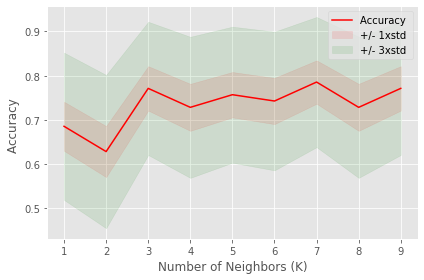

The best accuracy is with 0.7857142857142857 with k= 7


In [311]:
Ks=10
plt.plot(range(1,Ks),test_accuracy,'g',color='red')
plt.fill_between(range(1,Ks),np.array(test_accuracy) - 1 * np.array(std),np.array(test_accuracy) + 1 * np.array(std), alpha=0.10,color='red')
plt.fill_between(range(1,Ks),np.array(test_accuracy) - 3 * np.array(std),np.array(test_accuracy) + 3 * np.array(std), alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy is with", np.array(test_accuracy).max(), "with k=", np.array(test_accuracy).argmax()+1) 

### <b> The graphic representation corroborates the previous statement. K=7 seems to be the best choice</b>

              precision    recall  f1-score   support

  COLLECTION       0.50      0.27      0.35        15
     PAIDOFF       0.82      0.93      0.87        55

    accuracy                           0.79        70
   macro avg       0.66      0.60      0.61        70
weighted avg       0.75      0.79      0.76        70

Confusion matrix, without normalization
[[51  4]
 [11  4]]


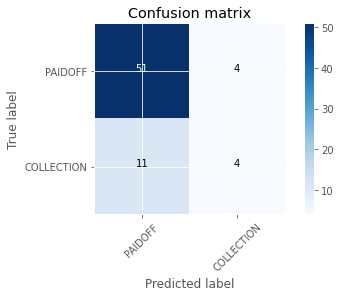

In [312]:
##confusion matrix function
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.style.use('ggplot')
cnf_matrix = confusion_matrix(y_test, yhats[6], labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhats[6]))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

<b> With K=7 the confusion matrix gives 50 true positives and 4 true negatives</b>

# Decision Tree


In [313]:
from sklearn.tree import DecisionTreeClassifier
cases=pd.DataFrame()
accuracy=pd.DataFrame()
yhats=[]
yfits=[]
for i in range(1,10):
    loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    yfits.append(loanTree)
    ##fit model
    loanTree.fit(X_train,y_train)
    
    ##Prediction
    predTree = loanTree.predict(X_test)
    yhats.append(predTree)
    cases=cases.append(pd.concat([pd.Series([i]*len(y_test)).rename('max_depth'),pd.Series(y_test).rename('Ytest'),pd.Series(predTree).rename('Y_pred')],axis=1))
    accuracy=accuracy.append(pd.concat([pd.Series(str(i)).rename('max_depth'),pd.Series(metrics.accuracy_score(y_test, predTree)).rename('Accuracy')],axis=1))
correct_cases=cases[cases['Ytest']==cases['Y_pred']].groupby('max_depth').count()
correct_cases.columns = [' '.join(col).strip() for col in correct_cases.columns.values]
correct_cases.reset_index(inplace=True)
accuracy.reset_index(inplace=True)
cases_accuracy=pd.concat([correct_cases,accuracy],axis=1)

cases_accuracy.iloc[:,[0,2,5]]

,max_depth,Y _ p r e d,Accuracy
0,1,55,0.785714
1,2,55,0.785714
2,3,43,0.614286
3,4,43,0.614286
4,5,45,0.642857
5,6,54,0.771429
6,7,53,0.757143
7,8,53,0.757143
8,9,46,0.657143


### <b>The max_depth=6 seems to be best choice since it has a good balance between accuracy and correct predictions. Let's see the ocnfusion matrix</b>

9               precision    recall  f1-score   support

  COLLECTION       0.33      0.07      0.11        15
     PAIDOFF       0.79      0.96      0.87        55

    accuracy                           0.77        70
   macro avg       0.56      0.52      0.49        70
weighted avg       0.69      0.77      0.71        70

Confusion matrix, without normalization
[[53  2]
 [14  1]]


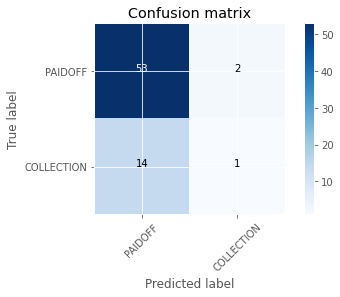

In [314]:
 ###confusion matrix
plt.style.use('ggplot')
cnf_matrix = confusion_matrix(y_test, yhats[5], labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)
print (i,classification_report(y_test, yhats[5]))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

<b> With max_depth=6 the confusion matrix gives 53 true positives and 1 true negatives</b>

In [315]:
###PLOT TREE
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
dot_data = StringIO()
filename = "loantree.png"
featureNames = Feature.columns[0:8]
out=tree.export_graphviz(yfits[5],feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train.astype(str)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
###extra - colors
import collections
colors = ('orange', 'forestgreen')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
######
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(20, 40))
plt.imshow(img,interpolation='nearest')

ModuleNotFoundError: No module named 'pydotplus'

[Text(125.55000000000001, 201.90857142857143, 'X[3] <= -0.188\nentropy = 0.823\nsamples = 276\nvalue = [71, 205]'),
 Text(45.654545454545456, 170.84571428571428, 'X[6] <= 0.14\nentropy = 0.126\nsamples = 116\nvalue = [2, 114]'),
 Text(30.436363636363637, 139.78285714285715, 'entropy = 0.0\nsamples = 71\nvalue = [0, 71]'),
 Text(60.872727272727275, 139.78285714285715, 'X[1] <= -0.57\nentropy = 0.262\nsamples = 45\nvalue = [2, 43]'),
 Text(45.654545454545456, 108.72, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(76.0909090909091, 108.72, 'X[1] <= 1.254\nentropy = 0.353\nsamples = 30\nvalue = [2, 28]'),
 Text(45.654545454545456, 77.65714285714284, 'X[1] <= -0.404\nentropy = 0.25\nsamples = 24\nvalue = [1, 23]'),
 Text(30.436363636363637, 46.59428571428572, 'X[0] <= -0.019\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(15.218181818181819, 15.531428571428563, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(45.654545454545456, 15.531428571428563, 'entropy = 0.811\nsampl

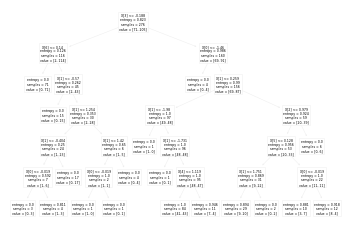

In [316]:
##or
from sklearn import tree
tree.plot_tree(yfits[5])

# Support Vector Machine


In [317]:
from sklearn import svm
yhat=[]
kernels=['linear', 'poly', 'rbf']
for i in kernels:
    clf = svm.SVC(kernel=i)
##fitting model
    clf.fit(X_train, y_train)
    #prediction
    yhat.append(clf.predict(X_test))

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



KERNEL = LINEAR

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        15
     PAIDOFF       0.79      1.00      0.88        55

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70

Avg F1-score: 0.6914
Jaccard score: 0.7857
Confusion matrix, without normalization
[[55  0]
 [15  0]]

KERNEL = POLY

              precision    recall  f1-score   support

  COLLECTION       0.33      0.07      0.11        15
     PAIDOFF       0.79      0.96      0.87        55

    accuracy                           0.77        70
   macro avg       0.56      0.52      0.49        70
weighted avg       0.69      0.77      0.71        70

Avg F1-score: 0.7065
Jaccard score: 0.7681
Confusion matrix, without normalization
[[53  2]
 [14  1]]

KERNEL = RBF

              precision    recall  f1-score   support

  COLLECTION       0.36      0.27     

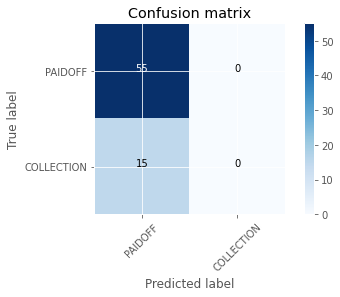

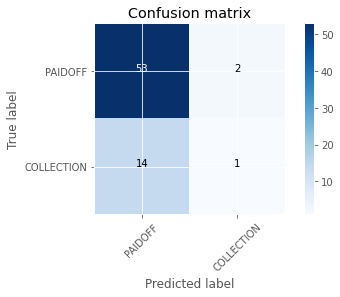

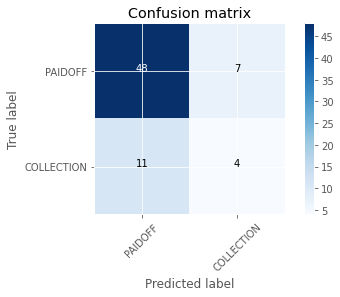

In [318]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
##confusion matrix
for i in range(len(yhat)):
    plt.style.use('ggplot')
    cnf_matrix = confusion_matrix(y_test, yhat[i], labels=['PAIDOFF','COLLECTION'])
    np.set_printoptions(precision=2)
    print('','KERNEL = ' + kernels[i].upper(),'',classification_report(y_test, yhat[i]),sep='\n')
    print("Avg F1-score: %.4f" % f1_score(y_test, yhat[i], average='weighted'))
    print("Jaccard score: %.4f" % jaccard_score(y_test, yhat[i],pos_label='PAIDOFF'))
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

### <b>The best Kernel to choose seems to be "rbf" since is the one that gets better accuracy and a better combination of true positives and true negatives in confusion matrix</b>

# Logistic Regression


In [319]:
from sklearn.linear_model import LogisticRegression
##fitting the model
##convert Y to numeric

yhat=[]
yhat_prob=[]
C_param_range = [0.001,0.01,0.1,1,10,100]
for i in C_param_range:
    LR = LogisticRegression(C=i, solver='liblinear').fit(X_train,y_train)
    ##prediction
    yhat.append(LR.predict(X_test))
    yhat_prob.append(LR.predict_proba(X_test))

C=0.001
              precision    recall  f1-score   support

  COLLECTION       0.27      0.27      0.27        15
     PAIDOFF       0.80      0.80      0.80        55

    accuracy                           0.69        70
   macro avg       0.53      0.53      0.53        70
weighted avg       0.69      0.69      0.69        70

Avg F1-score: 0.6857
Jaccard score: 0.6667
logloss 0.6708670709349659
Confusion matrix, without normalization
[[44 11]
 [11  4]]
C=0.01
              precision    recall  f1-score   support

  COLLECTION       0.22      0.13      0.17        15
     PAIDOFF       0.79      0.87      0.83        55

    accuracy                           0.71        70
   macro avg       0.50      0.50      0.50        70
weighted avg       0.67      0.71      0.69        70

Avg F1-score: 0.6860
Jaccard score: 0.7059
logloss 0.5771590960770101
Confusion matrix, without normalization
[[48  7]
 [13  2]]
C=0.1
              precision    recall  f1-score   support

  COLLECTION

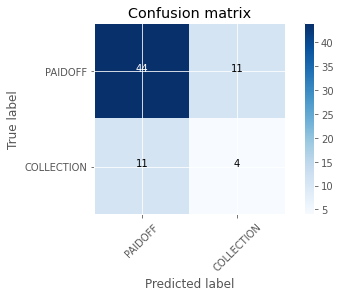

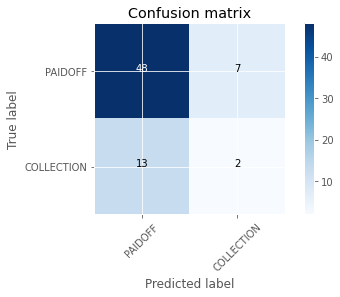

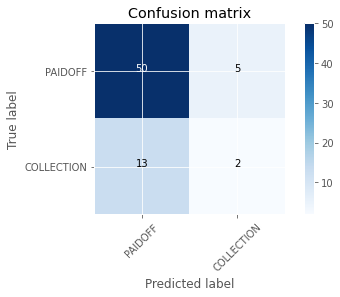

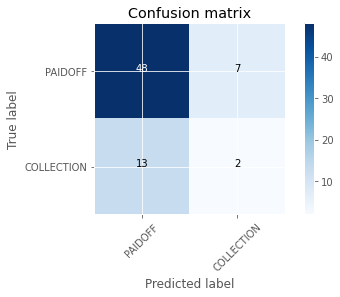

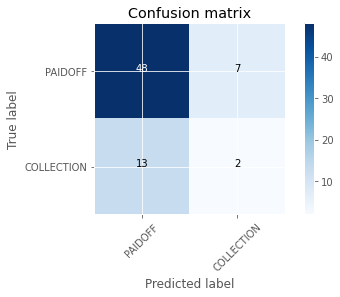

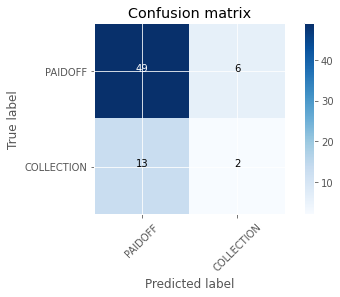

In [320]:
plt.style.use('ggplot')
from sklearn.metrics import log_loss
for i in range(len(yhat)):
    plt.style.use('ggplot')
    cnf_matrix = confusion_matrix(y_test, yhat[i], labels=['PAIDOFF','COLLECTION'])
    np.set_printoptions(precision=2)
    print('C=' + str(C_param_range[i]),classification_report(y_test, yhat[i]),sep='\n')
    print("Avg F1-score: %.4f" % f1_score(y_test, yhat[i], average='weighted'))
    print("Jaccard score: %.4f" % jaccard_score(y_test, yhat[i],pos_label='PAIDOFF'))
    print("logloss",log_loss(y_test, yhat_prob[i]))
    #print(cnf_matrix)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

### Looks like C=0.1 seems to be the best regularization to choose

# Model Evaluation using Test set


In [321]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [325]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-06-28 00:43:22--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-06-28 00:43:22 (41.5 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [326]:
test_df = pd.read_csv('loan_test.csv')
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Features = test_df[['terms','age','Gender','weekend']]
Features = pd.concat([Features,pd.get_dummies(test_df['education'])], axis=1)
Features.drop(['Master or Above'], axis = 1,inplace=True)


In [329]:
X=Features
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]
y = test_df['loan_status'].values
len(y)

54

In [335]:
#KNN  with K=7 (according to what was analysed during the training phase)
neigh = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)
#prediction
yhat_KNN = neigh.predict(X)
print("K Nearest Neighbor:")

KNN_F1_score = f1_score(y, yhat_KNN, average='weighted')
print("KNN Avg F1-score: %.2f" % KNN_F1_score )
KNN_Jaccard_score = jaccard_score(y, yhat_KNN,pos_label='PAIDOFF')
print("KNN Jaccard Score: %.2f" % KNN_Jaccard_score)



##Decision Tree (max_depth=6)
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree.fit(X_train,y_train)
yhat_DTR = Tree.predict(X)
print("Decision Tree:")
DTR_F1_score = f1_score(y, yhat_DTR, average='weighted')
print("DTR Avg F1-score: %.2f" % DTR_F1_score )
DTR_Jaccard_score = jaccard_score(y, yhat_DTR,pos_label='PAIDOFF')
print("DTR Jaccard Score: %.2f" % DTR_Jaccard_score)

##SVM (kernel='rbf')
clf = svm.SVC(kernel='rbf')
##fitting model
clf.fit(X_train, y_train)
yhat_SVM=clf.predict(X)
print("Support Vector Machine:")

SVM_F1_score = f1_score(y, yhat_SVM, average='weighted')
print("SVM Avg F1-score: %.2f" % SVM_F1_score )
SVM_Jaccard_score = jaccard_score(y, yhat_SVM,pos_label='PAIDOFF')
print("SVM Jaccard Score: %.2f" % SVM_Jaccard_score)

print("Logistic Regression:")
##Logistic regression (C='0.1')
LR = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)
##prediction
yhat_LR=LR.predict(X)
yhat_LR_proba = LR.predict_proba(X)
LR_F1_score = f1_score(y, yhat_LR, average='weighted')
print("LR Avg F1-score: %.2f" % LR_F1_score )
LR_Jaccard_score = jaccard_score(y, yhat_LR,pos_label='PAIDOFF')
print("LR Jaccard Score: %.2f" % LR_Jaccard_score)
Logloss = log_loss(y, yhat_LR_proba)
print("LogLoss: : %.2f" % Logloss)


K Nearest Neighbor:
KNN Avg F1-score: 0.67
KNN Jaccard Score: 0.69
Decision Tree:
DTR Avg F1-score: 0.67
DTR Jaccard Score: 0.71
Support Vector Machine:
SVM Avg F1-score: 0.79
SVM Jaccard Score: 0.80
Logistic Regression:
LR Avg F1-score: 0.67
LR Jaccard Score: 0.75
LogLoss: : 0.48


In [ ]:
KNN_F1_score = f1_score(y, yhat_KNN, average='weighted')


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.69    | 0.67     | NA      |
| Decision Tree      | 0.71    | 0.67     | NA      |
| SVM                | 0.8     | 0.79     | NA      |
| LogisticRegression | 0.75    | 0.67     | 0.48    |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description |
|---|---|---|---|
| 2020-10-27 | 2.1 | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27 | 2.0 | Malika Singla | Added lab to GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
